# Simulation Analysis Workflow

This notebook provides a complete analysis workflow for cilia simulations:
1. Load simulation data
2. Visualize basal and blob positions
3. Plot final simulation frame
4. Generate kymograph
5. Analyze wavelength using Fourier methods

All outputs are saved to `analysis_output/{category}_{date}/{N}fil/` subdirectories.

In [1]:
# Import libraries
import sys
sys.path.append('.')
from plotting_and_analysis_functions import *
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Define the simulation path
# Adjust the date and path according to your actual simulation
sim_path = '../data/ablation_study_0/20251010/ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift'

# Parameters (adjust these to match your simulation)
filament_length = 49.4  # Filament length in simulation units (L)
num_steps = 500         # Steps per period
sphere_radius = 197.6   # Sphere radius in simulation units
num_segs = 20           # Number of segments per filament

## 1. Load Simulation Data

In [2]:
# Load the simulation data
print("=" * 60)
print("LOADING SIMULATION DATA")
print("=" * 60)
sim = load_simulation(sim_path, num_steps=num_steps, sphere_radius=sphere_radius, num_segs=num_segs)
print(f"\n✅ Successfully loaded simulation:")
print(f"   • Timesteps: {sim.phases.shape[0]}")
print(f"   • Filaments: {sim.phases.shape[1]}")
print(f"   • Segments per filament: {sim.num_segs}")
print(f"   • Sphere radius: {sim.sphere_radius:.2f} units = {sim.sphere_radius/filament_length:.2f} L")
print(f"   • Filament length: {filament_length:.2f} units (L)")
print(f"   • Time duration: {sim.times[-1]:.2f} periods")
print("=" * 60)

LOADING SIMULATION DATA
[info] Using num_steps=500 for time normalization.

✅ Successfully loaded simulation:
   • Timesteps: 576
   • Filaments: 360
   • Segments per filament: 20
   • Sphere radius: 197.60 units = 4.00 L
   • Filament length: 49.40 units (L)
   • Time duration: 5.75 periods


## 2. Basal and Blob Position Visualization


PLOTTING BASAL POSITIONS


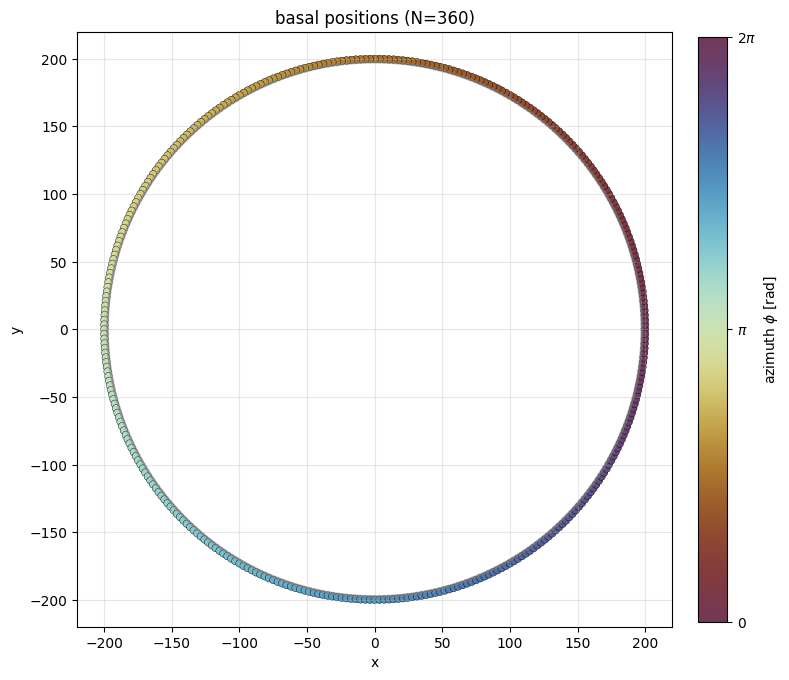

[info] Saved basal positions to analysis_output/ablation_study_0_20251010/360fil/ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_basal_azimuth.png
✅ Basal positions saved


In [3]:
# Plot basal positions
print("\n" + "=" * 60)
print("PLOTTING BASAL POSITIONS")
print("=" * 60)
fig_basal, ax_basal = plot_basal_positions(
    sim_path,
    sim=sim,
    color_by="azimuth",
    show=True,
    save=True
)
plt.close(fig_basal)
print("✅ Basal positions saved")


PLOTTING BLOB POSITIONS (Isometric View)


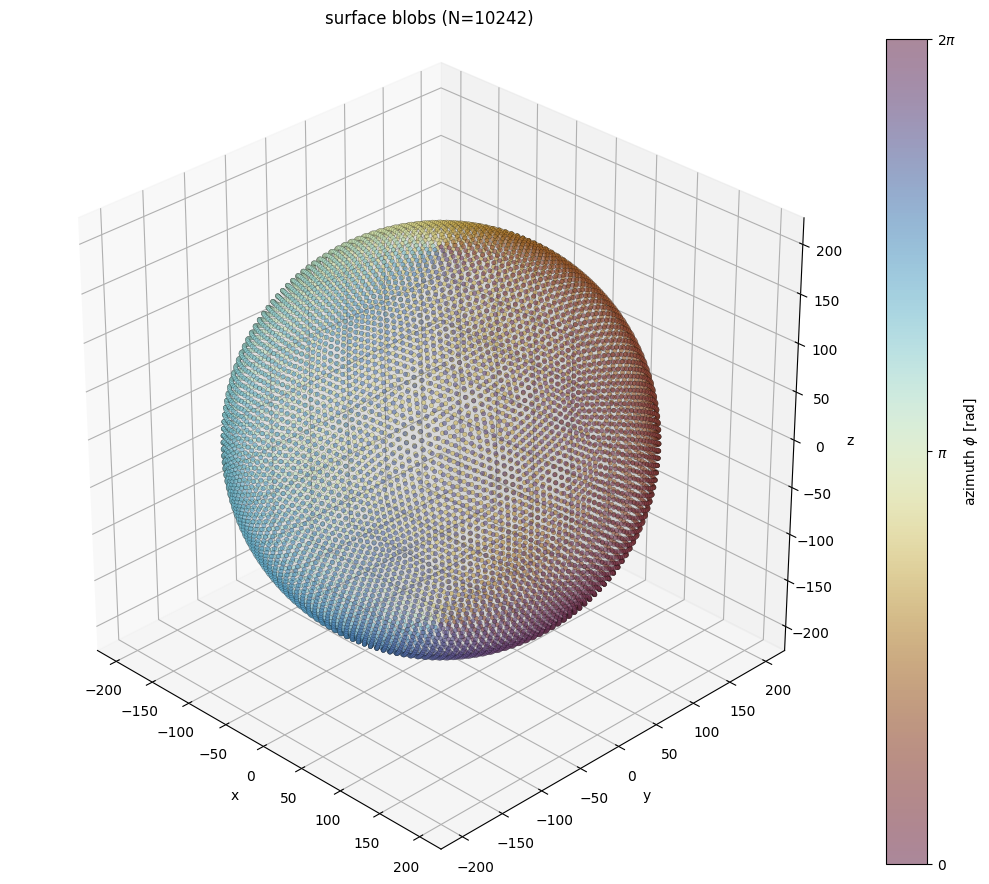

[info] Saved blob positions to analysis_output/ablation_study_0_20251010/360fil/ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_blobs_iso_azimuth.png
✅ Blob positions saved


In [4]:
# Plot blob positions (3D isometric view)
print("\n" + "=" * 60)
print("PLOTTING BLOB POSITIONS (Isometric View)")
print("=" * 60)
fig_blobs, ax_blobs = plot_blob_positions(
    sim_path,
    sim=sim,
    view="iso",
    color_by="azimuth",
    split_hemispheres=False,
    show=True,
    save=True
)
plt.close(fig_blobs)
print("✅ Blob positions saved")

## 3. Final Simulation Frame


PLOTTING FINAL FRAME
Final frame index: 575 (t = 5.75 periods)


/data/pz723/cuda-filaments/analysis/plotting_and_analysis_functions.py:393: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


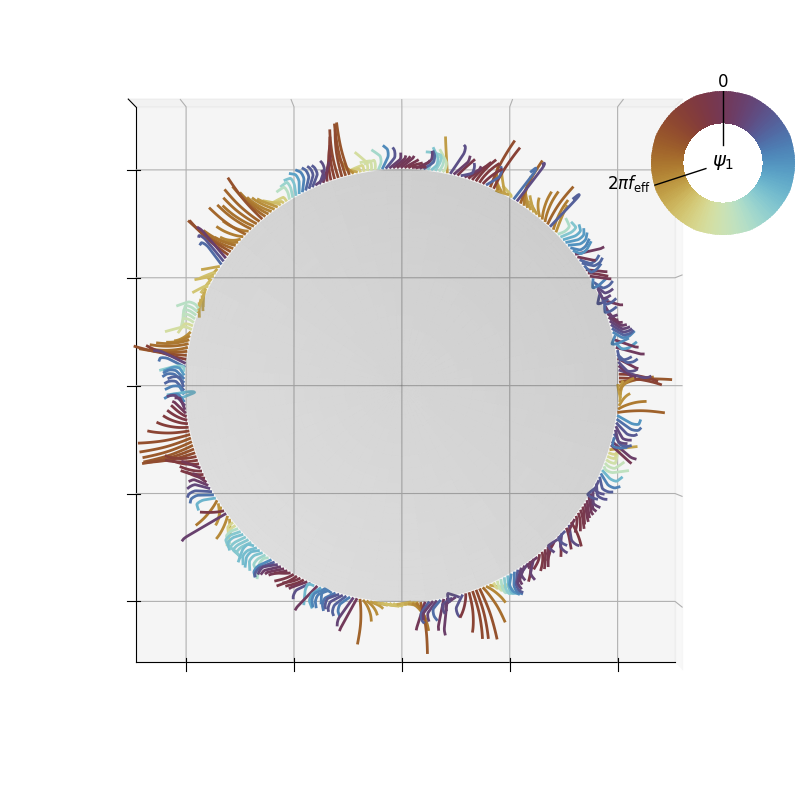

[info] Saved frame to analysis_output/ablation_study_0_20251010/360fil/ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_frame_last_top.png


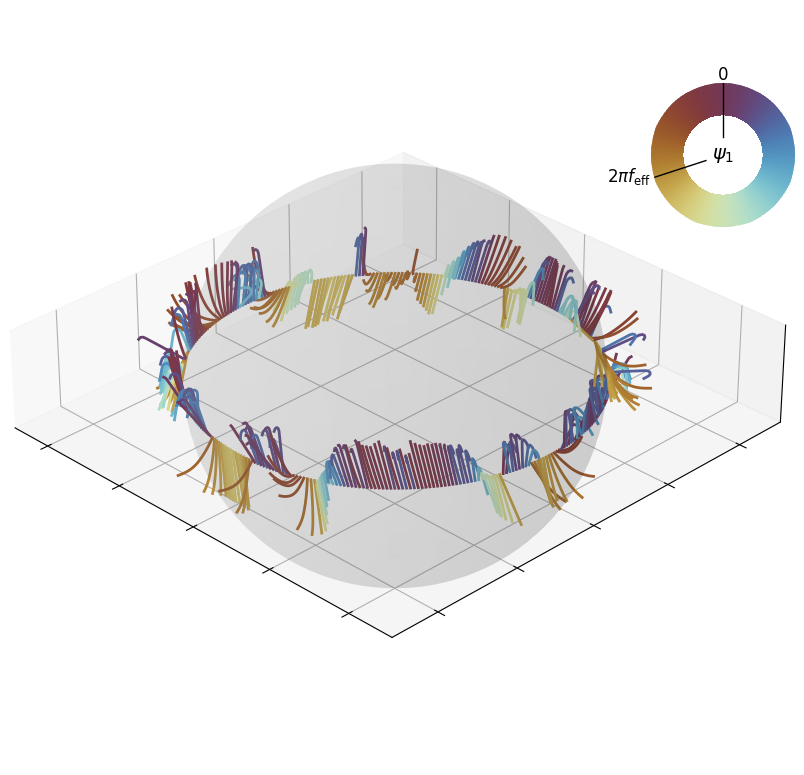

[info] Saved frame to analysis_output/ablation_study_0_20251010/360fil/ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_frame_last_iso.png
✅ Final frame visualizations saved


In [5]:
# Plot the final frame (last timestep)
print("\n" + "=" * 60)
print("PLOTTING FINAL FRAME")
print("=" * 60)
print(f"Final frame index: {sim.phases.shape[0]-1} (t = {sim.times[-1]:.2f} periods)")

# Top-down view
fig_final_top, ax_final_top = plot_frame(
    sim_path,
    sim=sim,
    frame="last",
    view="top",
    color_by_phase=True,
    show=True,
    save=True
)
plt.close(fig_final_top)

# Isometric view
fig_final_iso, ax_final_iso = plot_frame(
    sim_path,
    sim=sim,
    frame="last",
    view="iso",
    color_by_phase=True,
    show=True,
    save=True
)
plt.close(fig_final_iso)
print("✅ Final frame visualizations saved")

## 4. Kymograph Analysis


GENERATING KYMOGRAPH


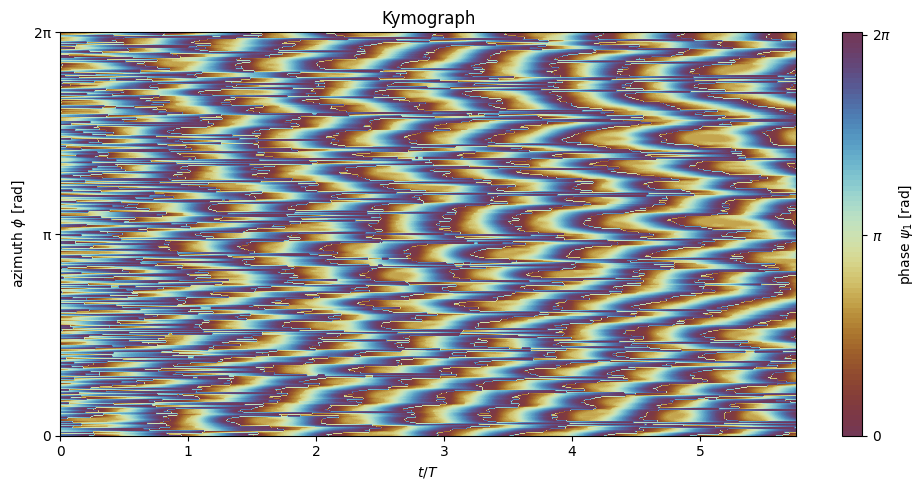

[info] Saved kymograph to analysis_output/ablation_study_0_20251010/360fil/ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_kymograph_phi.png
✅ Kymograph saved
   Note: Any gaps in the azimuthal coverage appear as blank regions


In [6]:
# Generate kymograph
print("\n" + "=" * 60)
print("GENERATING KYMOGRAPH")
print("=" * 60)
fig_kymo, ax_kymo = plot_kymograph(
    sim_path,
    sim=sim,
    use_phi_axis=True,  # Show azimuthal gaps naturally
    show=True,
    save=True
)
plt.close(fig_kymo)
print("✅ Kymograph saved")
print("   Note: Any gaps in the azimuthal coverage appear as blank regions")

## 5. Wavelength Analysis


ANALYZING WAVELENGTH (Fourier Method)
Analyzing phase patterns using spatial FFT...
This method handles ablation gaps through interpolation.

[info] Analyzing 116 time points with 360 cilia


/data/pz723/cuda-filaments/analysis/plotting_and_analysis_functions.py:1203: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


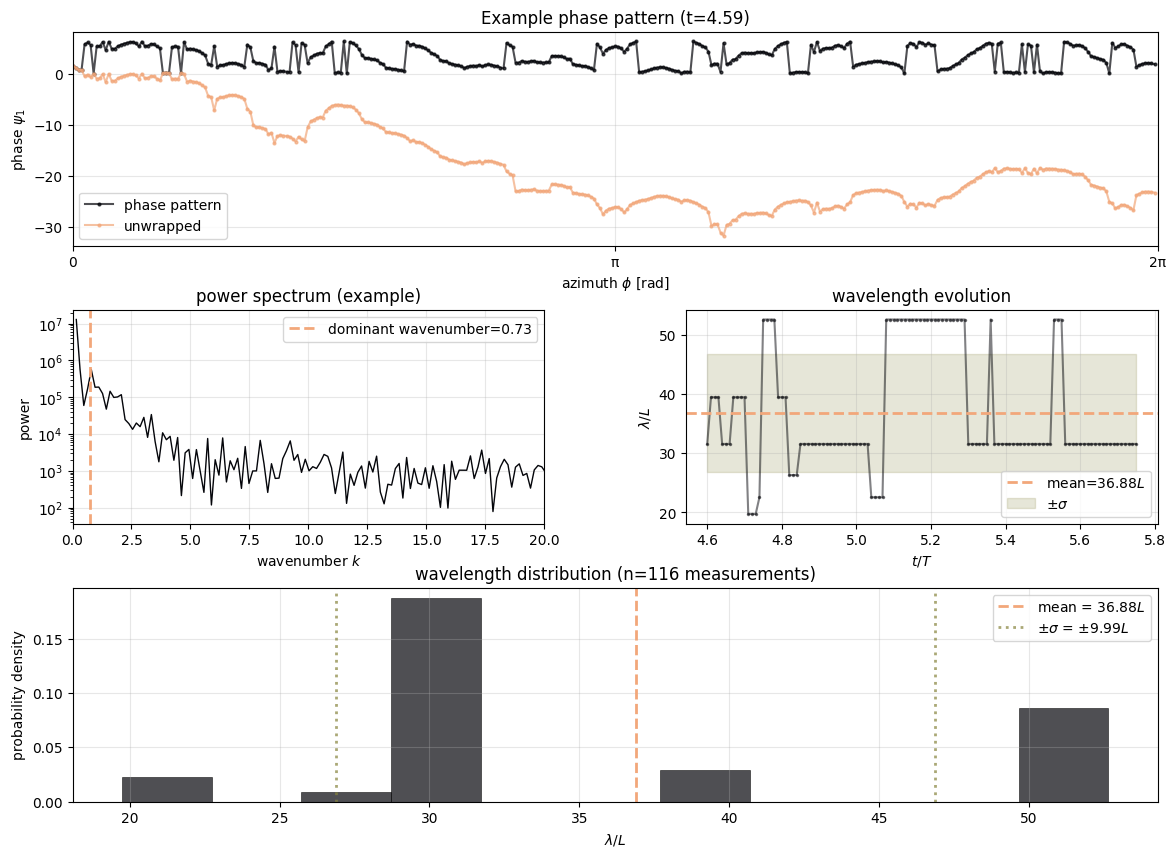


------------------------------------------------------------
WAVELENGTH ANALYSIS RESULTS
------------------------------------------------------------
Number of measurements: 116

Wavelength (angular):
  Mean:     9.2193 rad (528.23°)
  Std dev:  2.4981 rad

Wavelength (arc length):
  Mean:     1821.74 units = 36.88 L
  Std dev:  493.62 units = 9.99 L

Dominant wavenumber: 0.73 cycles per 2π
------------------------------------------------------------


In [7]:
# Perform Fourier-based wavelength analysis
print("\n" + "=" * 60)
print("ANALYZING WAVELENGTH (Fourier Method)")
print("=" * 60)
print("Analyzing phase patterns using spatial FFT...")
print("This method handles ablation gaps through interpolation.\n")

wavelength_result = estimate_wavelength_fourier(
    sim_path,
    sim=sim,
    filament_length=filament_length,
    time_window=None,  # Use last 20% of simulation by default
    n_interp=1024,
    show_analysis=True
)

print("\n" + "-" * 60)
print("WAVELENGTH ANALYSIS RESULTS")
print("-" * 60)
print(f"Number of measurements: {wavelength_result.n_measurements}")
print(f"\nWavelength (angular):")
print(f"  Mean:     {wavelength_result.mean_wavelength_rad:.4f} rad ({wavelength_result.mean_wavelength_rad*180/np.pi:.2f}°)")
print(f"  Std dev:  {wavelength_result.std_wavelength_rad:.4f} rad")
print(f"\nWavelength (arc length):")
print(f"  Mean:     {wavelength_result.wavelength_arc:.2f} units = {wavelength_result.wavelength_filaments:.2f} L")
print(f"  Std dev:  {wavelength_result.std_wavelength_rad * sim.sphere_radius:.2f} units = {wavelength_result.std_wavelength_rad * sim.sphere_radius / filament_length:.2f} L")
print(f"\nDominant wavenumber: {wavelength_result.dominant_wavenumber:.2f} cycles per 2π")
print("-" * 60)

## Summary

All analysis complete! Output files saved to `analysis_output/{category}_{date}/{N}fil/` directory:

- **Basal positions**: Shows where cilia attach to the sphere
- **Blob positions**: Shows the discrete representation of the sphere surface
- **Final frame**: Shows the cilia configuration at the end of the simulation
- **Kymograph**: Shows phase evolution over time and space
- **Wavelength analysis**: Quantifies the metachronal wavelength

**Note on units:**
- Time is reported in **periods** (beat cycles)
- Lengths are reported in both **simulation units** and **filament lengths (L)**
  - This makes wavelength directly comparable to filament length
  - Example: λ = 2.5 L means the wavelength is 2.5 times the filament length

The Fourier-based wavelength analysis automatically handles any ablation gaps through interpolation.

In [8]:
# Print file locations
print("\n" + "=" * 60)
print("OUTPUT FILE LOCATIONS")
print("=" * 60)

# Construct the output subdirectory path
sim_path_obj = Path(sim_path)
parent_name = sim_path_obj.parent.name
grandparent_name = sim_path_obj.parent.parent.name
out_subdir = f"{grandparent_name}_{parent_name}/{sim.num_fils}fil"
output_dir = Path("analysis_output") / out_subdir

print(f"Output directory: {output_dir}")
print()

if output_dir.exists():
    files = sorted(output_dir.glob("*"))
    for f in files:
        print(f"  • {f.name}")
else:
    print("  (Output directory not yet created)")
print("=" * 60)
print("\n✅ ANALYSIS COMPLETE!")


OUTPUT FILE LOCATIONS
Output directory: analysis_output/ablation_study_0_20251010/360fil

  • ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_basal_azimuth.png
  • ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_blobs_iso_azimuth.png
  • ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_frame_last_iso.png
  • ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_frame_last_top.png
  • ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_kymograph_phi.png

✅ ANALYSIS COMPLETE!
